In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
def rk2(f, x0, y0, l, n):
    # Метод Рунге-Кутта 2 порядка точности
    h = l / n
    X = [x0 + i * h for i in range(n + 1)] # делим ось x на отрезки
    Y = [y0] # y(x0) = y0
    for i in range(n):
        xi = X[i]
        yi = Y[i]
        k1 = f(xi, yi)
        k2 = f(xi + h, yi + k1 * h)
        # По рекурентной формуле вычисляем следующий y:
        Y.append(yi + h * (k1 + k2) / 2)
    return X, Y
    
    
def rk4(f, x0, y0, l, n):
    # Метод Рунге-Кутта 4 порядка точности
    h = l / n
    X = [x0 + i * h for i in range(n + 1)] # делим ось x на отрезки
    Y = [y0] # y(x0) = y0
    for i in range(n):
        xi = X[i]
        yi = Y[i]
        k1 = f(xi, yi)
        k2 = f(xi + h / 2, yi + k1 * h / 2)
        k3 = f(xi + h / 2, yi + k2 * h / 2)
        k4 = f(xi + h, yi + k2 * h)
        # По рекурентной формуле вычисляем следующий y:
        Y.append(yi + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    return X, Y

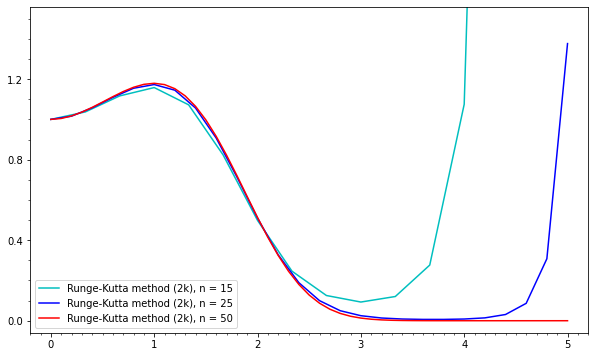

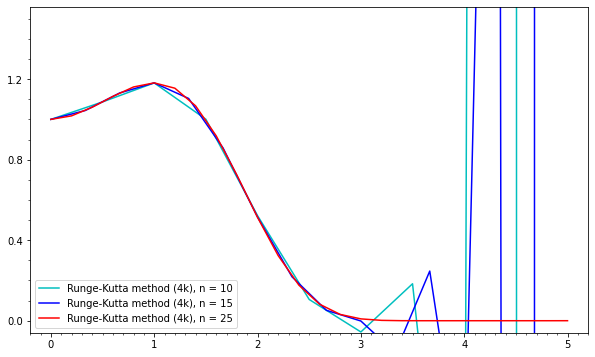

In [5]:
width = 10
height = 6
colors = ['c', 'b', 'r', 'k', 'm', 'g']

x0 = 0
y0 = 1
l = 5
f = lambda x, y: x * y * (1 - x) if y else 1
ymax = 1.5
dind = 25

for name, rk, ns in zip([2, 4], [rk2, rk4], [[15, 25, 50], [10, 15, 25]]):
    fig, ax = plt.subplots(figsize=(width, height))
    for n, c in zip(ns, colors):
        X, Y = rk(f, x0, y0, l, n)
        #Y = [y if y < height else None for y in Y]
        plt.plot(X, Y, color=c, label=f'Runge-Kutta method ({name}k), n = {n}')
    
    # Устанавливаем отступ от осей:
    ax.set_xlim([x0 - l / dind, x0 + l + l / dind])
    ax.set_ylim([0 - ymax / dind, ymax + ymax / dind])

    # Устанавливаем интервалы делений на осях x и y:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.4))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

    # Пишем названия графиков:
    plt.legend(loc='lower left')
    plt.show()